In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# TODO
# Implement the linear regression using gradient descent by only numpy

class LinearRegression:
    
    def __init__(self):
        
        print("Don't cheat.")
        self.epoch = []
        self.train_loss = []
        self.weights = None
        self.bias = 0

    def fit(self, X, y, lr=0.001, epochs=100, batch_size=1):
        n_samples, n_features = X.shape
        self.weights = self.weights = np.zeros(n_features)  
        new_a, new_b = 0,0

        for epoch in range(epochs):
            for batch in range(len(X)//batch_size):
               for i in range(len(X)):
                  new_a += 2*X[i]*(self.predict(X[i])-y[i])
                  new_b += 2*(self.predict(X[i])-y[i])
               new_a /= n_samples
               new_b /= n_samples
               self.weights = self.weights - new_a*lr
               self.bias = self.bias - new_b*lr
               #pass
            
            self.epoch.append(epoch)
            self.train_loss.append(self.get_loss(X, y))
            

    def MSE(self, data, answer, size):
        error = 0
        for i in range(size):
            difference = data[i] - answer[i]
            error += difference ** 2
        error /= size
        return error

    def get_loss(self, X, y):
        pred_y = self.predict(X)
        loss = self.MSE(pred_y, y, y.size)
        return loss
        #pass

    def predict(self, X):
        
        return np.dot(X, self.weights) + self.bias
        #pass
                
    def evaluate(self, X, y):
        pred_y = self.predict(X)
        loss = self.MSE(pred_y, y, y.size)
        return loss
        #pass
        
    def plot_curve(self):
        # self.epoch and self.train_loss may be helpful here. 
        plt.title("MSE Loss")
        plt.xlabel("Epoch")
        plt.ylabel("MSE")
        plt.plot(self.epoch, self.train_loss, label="Train MSE loss")
        plt.legend(loc="upper right")
        plt.show()  
        pass

# Load data & data pre-processing

In [ ]:
df_train = pd.DataFrame(pd.read_csv("./regression_train.csv"))
df_val   = pd.DataFrame(pd.read_csv("./regression_val.csv"))
df_test  = pd.DataFrame(pd.read_csv("./regression_test.csv"))

In [ ]:
df_train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df_test.head()

,age,sex,bmi,children,smoker,region,charges
0,33,male,30.25,0,no,southeast,NaN
1,19,female,32.49,0,yes,northwest,NaN
2,50,male,37.07,1,no,southeast,NaN
3,41,female,32.60,3,no,southwest,NaN
4,52,female,24.86,0,no,southeast,NaN


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       938 non-null    int64  
 1   sex       938 non-null    object 
 2   bmi       938 non-null    float64
 3   children  938 non-null    int64  
 4   smoker    938 non-null    object 
 5   region    938 non-null    object 
 6   charges   938 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 51.4+ KB


In [ ]:
# TODO
# You may do the labelEncoder here

#### For multiple features, please use the following settings.####
# sex.female -> 0
# sex.male -> 1

# smoker.no -> 0
# smoker.yes -> 1

# region.northeast -> 0
# region.northwest -> 1
# region.southeast -> 2
# region.southwest -> 3
##################################################################
dict = {"female":0, "male":1, "no":0, "yes":1, "northeast":0, "northwest":1,"southeast":2,"southwest":3}
df_train["sex"] = df_train["sex"].map(dict)
df_train["smoker"] = df_train["smoker"].map(dict)
df_train["region"] = df_train["region"].map(dict)

print(df_train)
df_val["sex"] = df_val["sex"].map(dict)
df_val["smoker"] = df_val["smoker"].map(dict)
df_val["region"] = df_val["region"].map(dict)

df_test["sex"] = df_test["sex"].map(dict)
df_test["smoker"] = df_test["smoker"].map(dict)
df_test["region"] = df_test["region"].map(dict)

# You may try different label encoding for training your own model


     age  sex     bmi  children  smoker  region      charges
0     19    0  27.900         0       1       3  16884.92400
1     18    1  33.770         1       0       2   1725.55230
2     28    1  33.000         3       0       2   4449.46200
3     33    1  22.705         0       0       1  21984.47061
4     32    1  28.880         0       0       1   3866.85520
..   ...  ...     ...       ...     ...     ...          ...
933   45    0  35.300         0       0       3   7348.14200
934   32    1  37.180         2       0       2   4673.39220
935   59    0  27.500         0       0       3  12233.82800
936   44    1  29.735         2       0       0  32108.66282
937   39    0  24.225         5       0       1   8965.79575

[938 rows x 7 columns]


# Single feature (using bmi)

In [ ]:
# Do not modify here

x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']
x_train = x_train[['bmi']]

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']
x_val = x_val[['bmi']]

x_test = df_test.drop(['charges'], axis=1)
x_test = x_test[['bmi']]

In [ ]:
# TODO
# You may convert data to NumPy here 
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

x_val = x_val.to_numpy()
y_val = y_val.to_numpy()

x_test = x_test.to_numpy()

In [ ]:
batch_size = x_train.shape[0]

# TODO
# Tune the parameters
# Refer to slide page 9
lr = 0.001
epochs = 120000

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

Don't cheat.


In [ ]:
print("Intercepts: ", linear_reg.bias)
print("Weights: ", linear_reg.weights)

Intercepts:  1382.3218777221728
Weights:  [380.14135826]


In [ ]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

training loss:  139562065.48511875


In [ ]:
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

validation loss:  136920254.62600943


In [ ]:
test_pred = linear_reg.predict(x_test)

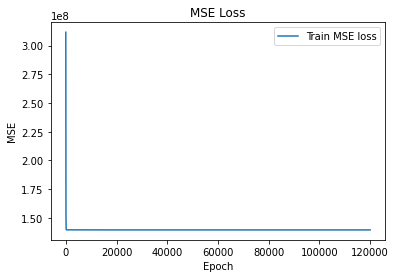

In [ ]:
linear_reg.plot_curve()

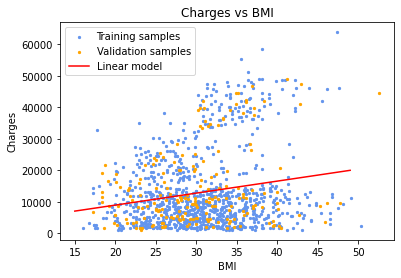

In [ ]:
# Use matplotlib to plot the predicted line with the training and validation samples

# TODO

x1 = x_train
x2 = x_val
x3 = np.arange(15, 50)

y1 = y_train
y2 = y_val
y3 = linear_reg.weights*x3 + linear_reg.bias

plt.title("Charges vs BMI")
plt.xlabel("BMI")
plt.ylabel("Charges")

plt.scatter(x1, y1, color='cornflowerblue', s=5, label='Training samples')
plt.scatter(x2, y2, color='orange', s=5, label='Validation samples')
plt.plot(x3, y3, color='red', label='Linear model')
plt.legend(loc="upper left")
plt.show()  
# plt.show()

# Multiple features

In [ ]:
# Do not modify here

x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']

x_test = df_test.drop(['charges'], axis=1)

In [ ]:
# TODO
# You may convert data to NumPy here 
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

x_val = x_val.to_numpy()
y_val = y_val.to_numpy()

x_test = x_test.to_numpy()

In [ ]:
batch_size = x_train.shape[0]

# TODO
# Tune the parameters
# Refer to slide page 10
lr = 0.0003
epochs = 720000

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

Don't cheat.


In [ ]:
print("Intercepts: ", linear_reg.bias)
print("Weights: ", linear_reg.weights)

Intercepts:  -11857.002034875066
Weights:  [  259.85060556  -383.54881022   333.33126494   442.55656638
 24032.21870328  -416.01544821]


In [ ]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

training loss:  34697170.25360717


In [ ]:
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

validation loss:  41958561.75087598


In [ ]:
test_pred = linear_reg.predict(x_test)

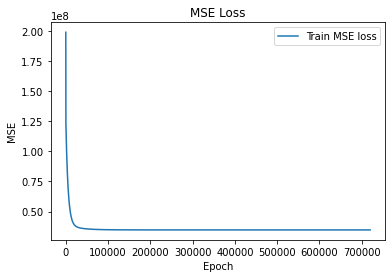

In [ ]:
linear_reg.plot_curve()

# Train your own model and predict for testing data.

### Data analysis

Data distribution

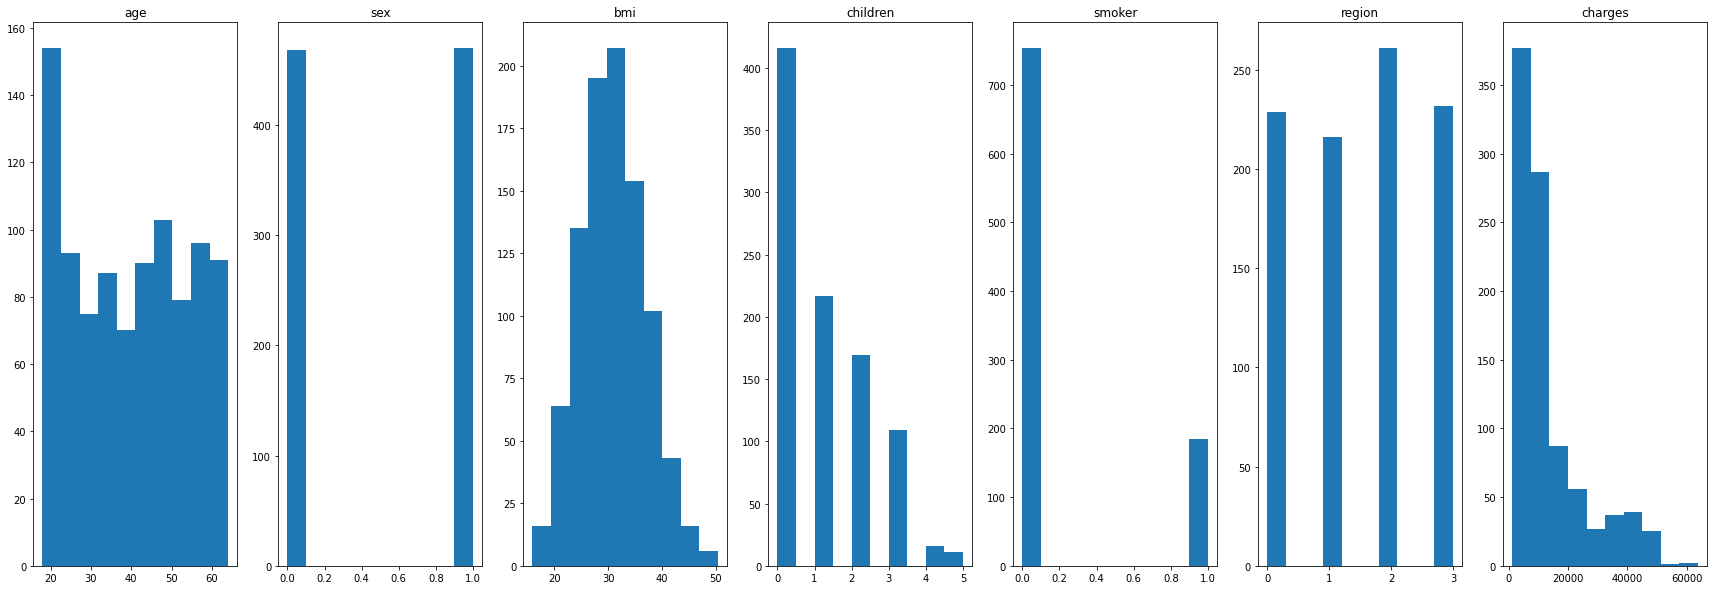

In [ ]:
fig, axes = plt.subplots(1, 7, figsize=(30, 10))
axes[0].hist(df_train['age'])
axes[0].set_title("age")
axes[1].hist(df_train['sex'])
axes[1].set_title("sex")
axes[2].hist(df_train['bmi'])
axes[2].set_title("bmi")
axes[3].hist(df_train['children'])
axes[3].set_title("children")
axes[4].hist(df_train['smoker'])
axes[4].set_title("smoker")
axes[5].hist(df_train['region'])
axes[5].set_title("region")
axes[6].hist(df_train['charges'])
axes[6].set_title("charges")
plt.show()

Feature importance

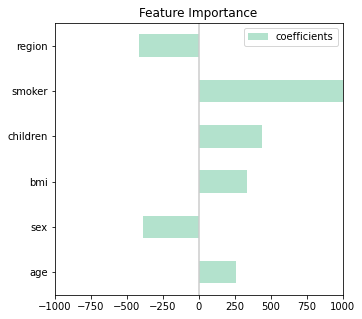

In [ ]:
# Take the model weights trained above to observe the feature importance
weight_list = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

coef = pd.DataFrame(linear_reg.weights, index = weight_list, columns = ["coefficients"])
coef.plot(kind='barh', figsize=(8, 5), colormap = "Pastel2")
plt.title('Feature Importance')
plt.axvline(x=0, color='.8')
plt.xlim(-1000, 1000)
plt.subplots_adjust(left=.4)

Pearson Correlation

In [ ]:
features = np.array(df_train.columns)
df = pd.DataFrame(df_train.corr(),index = features, columns=features)
df.style.background_gradient(cmap ='Blues')

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.053253,0.105642,0.033802,-0.004509,-0.006884,0.324213
sex,-0.053253,1.000000,0.015213,0.023992,0.068751,-0.002937,0.025908
bmi,0.105642,0.015213,1.000000,0.025009,-0.005701,0.141745,0.189973
children,0.033802,0.023992,0.025009,1.000000,-0.012050,0.000552,0.048509
smoker,-0.004509,0.068751,-0.005701,-0.012050,1.000000,-0.012810,0.789616
region,-0.006884,-0.002937,0.141745,0.000552,-0.012810,1.000000,-0.026971
charges,0.324213,0.025908,0.189973,0.048509,0.789616,-0.026971,1.000000


Select feature by Pearson Correlation

In [ ]:
x_train = df_train
y_train = df_train['charges']
y_train = y_train.to_numpy()
x_val = df_val
y_val = df_val['charges']
y_val = y_val.to_numpy()

x_test = df_test


batch_size = x_train.shape[0]
lr = 0.0001
epochs = 1000

thresholds = [0.01, 0.026, 0.04, 0.1, 0.2, 0.5]

for threshold in thresholds:
    highly_corr_features = x_train.columns[x_train.corr()['charges'].abs() > threshold]
    highly_corr_features = highly_corr_features.drop('charges')
    x_train_subset = x_train[highly_corr_features]
    x_val_subset = x_val[highly_corr_features]
    print('\n', highly_corr_features)
    # convert data to NumPy  
    x_train_subset = x_train_subset.to_numpy()
    x_val_subset = x_val_subset.to_numpy()
    

    linear_reg = LinearRegression()
    linear_reg.fit(x_train_subset, y_train, lr=lr, epochs=epochs, batch_size=batch_size)
    print('training loss: ', linear_reg.evaluate(x_train_subset, y_train))
    print('validation loss: ', linear_reg.evaluate(x_val_subset, y_val))
    


 Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')
Don't cheat.
training loss:  121819964.42492533
validation loss:  129471148.3836261

 Index(['age', 'bmi', 'children', 'smoker', 'region'], dtype='object')
Don't cheat.
training loss:  121825461.58827032
validation loss:  129497164.5234664

 Index(['age', 'bmi', 'children', 'smoker'], dtype='object')
Don't cheat.
training loss:  122018915.3651916
validation loss:  129674741.1591609

 Index(['age', 'bmi', 'smoker'], dtype='object')
Don't cheat.
training loss:  122050847.17972216
validation loss:  129816528.79817545

 Index(['age', 'smoker'], dtype='object')
Don't cheat.
training loss:  124415302.30670759
validation loss:  137676555.16453353

 Index(['smoker'], dtype='object')
Don't cheat.
training loss:  246934378.95588085
validation loss:  267608129.26484326


df_train box plot

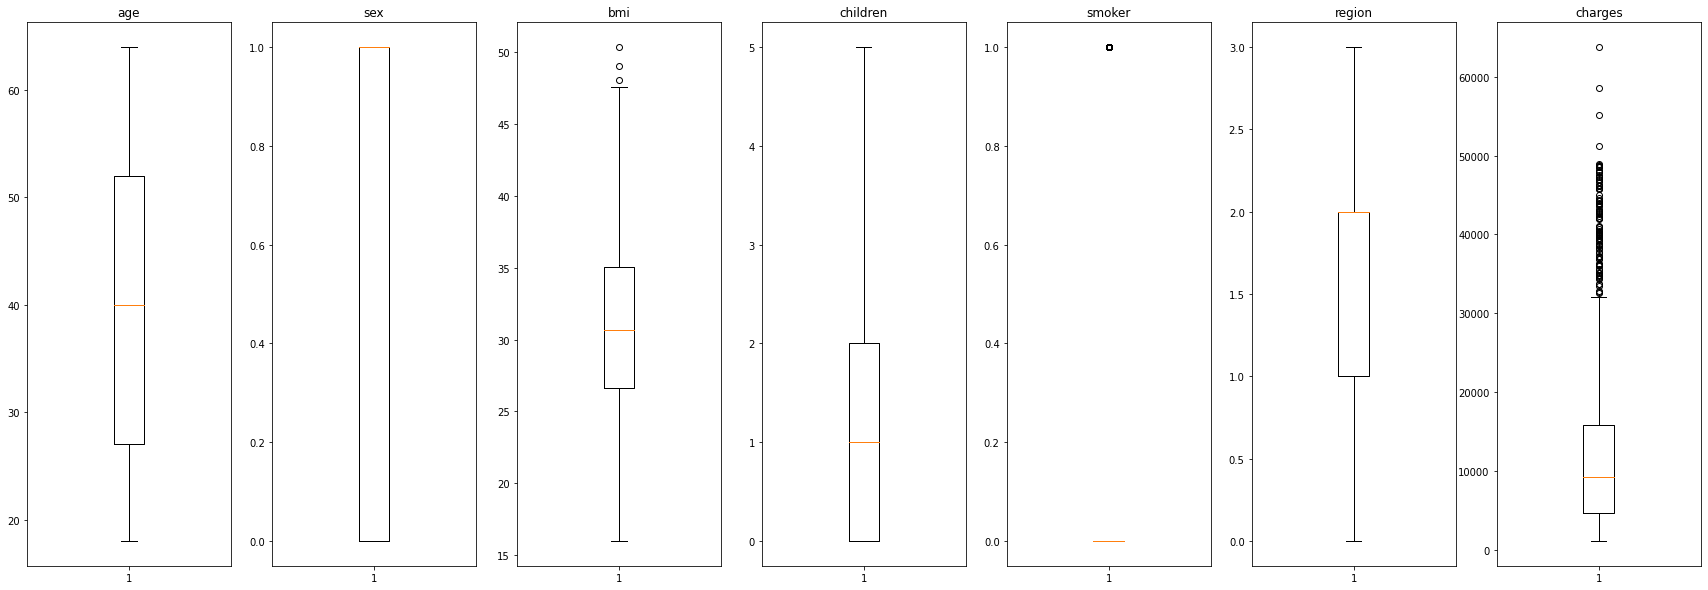

In [ ]:
fig, axes = plt.subplots(1,7, figsize =(30, 10))
# Creating plot
axes[0].boxplot(df_train['age'])
axes[0].set_title("age")
axes[1].boxplot(df_train['sex'])
axes[1].set_title("sex")
axes[2].boxplot(df_train['bmi'])
axes[2].set_title("bmi")
axes[3].boxplot(df_train['children'])
axes[3].set_title("children")
axes[4].boxplot(df_train['smoker'])
axes[4].set_title("smoker")
axes[5].boxplot(df_train['region'])
axes[5].set_title("region")
axes[6].boxplot(df_train['charges'])
axes[6].set_title("charges")
# show plot
plt.show()

### Modify outlier

In [ ]:
def outlier(data):
  # finding the 1st quartile
  q1 = np.quantile(data, 0.25)
  
  # finding the 3rd quartile
  q3 = np.quantile(data, 0.75)
  med = np.median(data)
  
  # finding the iqr region
  iqr = q3-q1
  
  # finding upper and lower whiskers
  upper_bound = q3+(1.5*iqr)
  lower_bound = q1-(1.5*iqr)
  print(upper_bound, lower_bound)

  outliers = data[(data <= lower_bound) | (data >= upper_bound)]
  
  print('The following are the outliers in the boxplot:\n{}'.format(outliers))

  return upper_bound, lower_bound

### Encoding method comparison

One-hot encoding

In [ ]:
df_train = pd.DataFrame(pd.read_csv("./regression_train.csv"))
df_val   = pd.DataFrame(pd.read_csv("./regression_val.csv"))
df_test  = pd.DataFrame(pd.read_csv("./regression_test.csv"))

df_train = pd.get_dummies(df_train,columns=['smoker'])
df_val = pd.get_dummies(df_val,columns=['smoker'])
df_test = pd.get_dummies(df_test,columns=['smoker'])
df_train

,age,sex,bmi,children,region,charges,smoker_no,smoker_yes
0,19,female,27.900,0,southwest,16884.92400,0,1
1,18,male,33.770,1,southeast,1725.55230,1,0
2,28,male,33.000,3,southeast,4449.46200,1,0
3,33,male,22.705,0,northwest,21984.47061,1,0
4,32,male,28.880,0,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...
933,45,female,35.300,0,southwest,7348.14200,1,0
934,32,male,37.180,2,southeast,4673.39220,1,0
935,59,female,27.500,0,southwest,12233.82800,1,0
936,44,male,29.735,2,northeast,32108.66282,1,0


In [ ]:
dict = {"female":0, "male":1, "no":0, "yes":1, "northeast":0, "northwest":1,"southeast":2,"southwest":3}
df_train["sex"] = df_train["sex"].map(dict)
df_train["region"] = df_train["region"].map(dict)
print(df_train)

df_val["sex"] = df_val["sex"].map(dict)
df_val["region"] = df_val["region"].map(dict)

df_test["sex"] = df_test["sex"].map(dict)
df_test["region"] = df_test["region"].map(dict)

     age  sex     bmi  children  region      charges  smoker_no  smoker_yes
0     19    0  27.900         0       3  16884.92400          0           1
1     18    1  33.770         1       2   1725.55230          1           0
2     28    1  33.000         3       2   4449.46200          1           0
3     33    1  22.705         0       1  21984.47061          1           0
4     32    1  28.880         0       1   3866.85520          1           0
..   ...  ...     ...       ...     ...          ...        ...         ...
933   45    0  35.300         0       3   7348.14200          1           0
934   32    1  37.180         2       2   4673.39220          1           0
935   59    0  27.500         0       3  12233.82800          1           0
936   44    1  29.735         2       0  32108.66282          1           0
937   39    0  24.225         5       1   8965.79575          1           0

[938 rows x 8 columns]


In [ ]:
x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']

x_test = df_test.drop(['charges'], axis=1)

# convert data to NumPy here 
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

x_val = x_val.to_numpy()
y_val = y_val.to_numpy()

x_test = x_test.to_numpy()

# Standardization
x_train = (x_train - x_train.mean())/(x_train.std())
x_val = (x_val - x_val.mean())/(x_val.std())
x_test = (x_test - x_test.mean())/(x_test.std())

# training
batch_size = x_train.shape[0]

lr = 0.001   
epochs = 10000

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)
print("Intercepts: ", linear_reg.bias)
print("Weights: ", linear_reg.weights)
print('training loss: ', linear_reg.evaluate(x_train, y_train))
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

Don't cheat.
Intercepts:  156.27708503270313
Weights:  [ 4341.42201145   190.95459867  4661.84158875   531.31050586
  -666.98366887 -4541.02666488  4352.03456146]
training loss:  122038555.1695654
validation loss:  129325467.88297674


Target encoding

In [ ]:
df_train = pd.DataFrame(pd.read_csv("./regression_train.csv"))
df_val   = pd.DataFrame(pd.read_csv("./regression_val.csv"))
df_test  = pd.DataFrame(pd.read_csv("./regression_test.csv"))

In [ ]:
df_train["smoker"] = df_train.groupby("smoker")["charges"].transform("mean")
df_val["smoker"] = df_val.groupby("smoker")["charges"].transform("mean")
df_test["smoker"] = df_val.groupby("smoker")["charges"].transform("mean")

dict = {"female":1, "male":2, "no":0, "yes":1, "northeast":0, "northwest":1,"southeast":2,"southwest":3}
df_train["sex"] = df_train["sex"].map(dict)
df_train["region"] = df_train["region"].map(dict)

df_val["sex"] = df_val["sex"].map(dict)
df_val["region"] = df_val["region"].map(dict)

df_test["sex"] = df_test["sex"].map(dict)
df_test["region"] = df_test["region"].map(dict)

df_train.head 

<bound method NDFrame.head of      age  sex     bmi  children        smoker  region      charges
0     19    1  27.900         0  32362.851486       3  16884.92400
1     18    2  33.770         1   8435.771213       2   1725.55230
2     28    2  33.000         3   8435.771213       2   4449.46200
3     33    2  22.705         0   8435.771213       1  21984.47061
4     32    2  28.880         0   8435.771213       1   3866.85520
..   ...  ...     ...       ...           ...     ...          ...
933   45    1  35.300         0   8435.771213       3   7348.14200
934   32    2  37.180         2   8435.771213       2   4673.39220
935   59    1  27.500         0   8435.771213       3  12233.82800
936   44    2  29.735         2   8435.771213       0  32108.66282
937   39    1  24.225         5   8435.771213       1   8965.79575

[938 rows x 7 columns]>

In [ ]:
x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']

x_test = df_test.drop(['charges'], axis=1)

# convert data to NumPy here 
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

x_val = x_val.to_numpy()
y_val = y_val.to_numpy()

x_test = x_test.to_numpy()

# Standardization
x_train = (x_train - x_train.mean())/(x_train.std())
x_val = (x_val - x_val.mean())/(x_val.std())
x_test = (x_test - x_test.mean())/(x_test.std())

# training
batch_size = x_train.shape[0]

lr = 0.001   
epochs = 10000

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)
print("Intercepts: ", linear_reg.bias)
print("Weights: ", linear_reg.weights)
print('training loss: ', linear_reg.evaluate(x_train, y_train))
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

Don't cheat.
Intercepts:  1409.087208096666
Weights:  [-307.72536987 -497.17158113 -444.84814564 -494.06607632 6241.4734287
 -497.3586147 ]
training loss:  54520975.11008555
validation loss:  58687292.09539316


### Train my own model

In [ ]:
df_train = pd.DataFrame(pd.read_csv("./regression_train.csv"))
df_val   = pd.DataFrame(pd.read_csv("./regression_val.csv"))
df_test  = pd.DataFrame(pd.read_csv("./regression_test.csv"))

# target encoding
df_train["smoker"] = df_train.groupby("smoker")["charges"].transform("mean")
df_val["smoker"] = df_val.groupby("smoker")["charges"].transform("mean")
df_test["smoker"] = df_val.groupby("smoker")["charges"].transform("mean")


dict = {"female":1, "male":2, "no":0, "yes":1, "northeast":0, "northwest":1,"southeast":2,"southwest":3}
df_train["sex"] = df_train["sex"].map(dict)
df_train["region"] = df_train["region"].map(dict)

print(df_train)
df_val["sex"] = df_val["sex"].map(dict)
df_val["region"] = df_val["region"].map(dict)

df_test["sex"] = df_test["sex"].map(dict)
df_test["region"] = df_test["region"].map(dict)

     age  sex     bmi  children        smoker  region      charges
0     19    1  27.900         0  32362.851486       3  16884.92400
1     18    2  33.770         1   8435.771213       2   1725.55230
2     28    2  33.000         3   8435.771213       2   4449.46200
3     33    2  22.705         0   8435.771213       1  21984.47061
4     32    2  28.880         0   8435.771213       1   3866.85520
..   ...  ...     ...       ...           ...     ...          ...
933   45    1  35.300         0   8435.771213       3   7348.14200
934   32    2  37.180         2   8435.771213       2   4673.39220
935   59    1  27.500         0   8435.771213       3  12233.82800
936   44    2  29.735         2   8435.771213       0  32108.66282
937   39    1  24.225         5   8435.771213       1   8965.79575

[938 rows x 7 columns]


In [ ]:
# modify outlier
bmi_upper_bound, bmi_lower_bound = outlier(df_train['bmi'])
bmi_median = np.percentile(df_train['bmi'], 50)        # median of df_train['bmi']
df_train.loc[(df_train['bmi'] <bmi_lower_bound) | (df_train['bmi']>bmi_upper_bound), 'bmi'] = bmi_median

# create new features
x_train = df_train.drop(['charges'], axis=1)
x_train['sex_smoker'] = df_train['sex']*df_train['smoker']
x_train['bmi_smoker'] = df_train['bmi']*df_train['smoker']
x_train['children_smoker'] = df_train['children']*df_train['smoker']
x_train['region_smoker'] = df_train['region']*df_train['smoker']
x_train['region_bmi'] = df_train['region']*df_train['bmi']
x_train['age_bmi'] = df_train['age']*df_train['bmi']
y_train = df_train['charges']
#print(x_train)

x_val = df_val.drop(['charges'], axis=1)
x_val['sex_smoker'] = df_val['sex']*df_val['smoker']
x_val['bmi_smoker'] = df_val['bmi']*df_val['smoker']
x_val['children_smoker'] = df_val['children']*df_val['smoker']
x_val['region_smoker'] = df_val['region']*df_val['smoker']
x_val['region_bmi'] = df_val['region']*df_val['bmi']
x_val['age_bmi'] = df_val['age']*df_val['bmi']
y_val = df_val['charges']

x_test = df_test.drop(['charges'], axis=1)
x_test['sex_smoker'] = df_test['sex']*df_test['smoker']
x_test['bmi_smoker'] = df_test['bmi']*df_test['smoker']
x_test['children_smoker'] = df_test['children']*df_test['smoker']
x_test['region_smoker'] = df_test['region']*df_test['smoker']
x_test['region_bmi'] = df_test['region']*df_test['bmi']
x_test['age_bmi'] = df_test['age']*df_test['bmi']

x_train

47.73625000000001 13.926249999999994
The following are the outliers in the boxplot:
116    49.06
286    48.07
847    50.38
Name: bmi, dtype: float64


,age,sex,bmi,children,smoker,region,sex_smoker,bmi_smoker,children_smoker,region_smoker,region_bmi,age_bmi
0,19,1,27.900,0,32362.851486,3,32362.851486,902923.556457,0.000000,97088.554458,83.700,530.100
1,18,2,33.770,1,8435.771213,2,16871.542426,284875.993855,8435.771213,16871.542426,67.540,607.860
2,28,2,33.000,3,8435.771213,2,16871.542426,278380.450021,25307.313638,16871.542426,66.000,924.000
3,33,2,22.705,0,8435.771213,1,16871.542426,191534.185386,0.000000,8435.771213,22.705,749.265
4,32,2,28.880,0,8435.771213,1,16871.542426,243625.072624,0.000000,8435.771213,28.880,924.160
...,...,...,...,...,...,...,...,...,...,...,...,...
933,45,1,35.300,0,8435.771213,3,8435.771213,297782.723810,0.000000,25307.313638,105.900,1588.500
934,32,2,37.180,2,8435.771213,2,16871.542426,313641.973690,16871.542426,16871.542426,74.360,1189.760
935,59,1,27.500,0,8435.771213,3,8435.771213,231983.708351,0.000000,25307.313638,82.500,1622.500
936,44,2,29.735,2,8435.771213,0,16871.542426,250837.657011,16871.542426,0.000000,0.000,1308.340


In [ ]:
# Standardization
x_train = (x_train - x_train.mean())/(x_train.std())
x_val = (x_val - x_val.mean())/(x_val.std())
x_test = (x_test - x_test.mean())/(x_test.std())

# convert data to NumPy  
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

x_val = x_val.to_numpy()
y_val = y_val.to_numpy()

x_test = x_test.to_numpy()

In [ ]:
# training
batch_size = x_train.shape[0]

lr = 0.0043 
epochs = 10000  

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

print("Intercepts: ", linear_reg.bias)
print("Weights: ", linear_reg.weights)
print('training loss: ', linear_reg.evaluate(x_train, y_train))
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

Don't cheat.
Intercepts:  13129.356255681132
Weights:  [ 3503.02342746  -153.66747912 -2053.2065751    658.68300161
 -5329.22717804   825.62219466  -315.07644994 16312.59790977
   -88.87415623  -289.42252314 -1288.43058669   347.56640853]
training loss:  21655453.107878134
validation loss:  29013618.726244316


In [ ]:
test_pred = linear_reg.predict(x_test)
test_pred = test_pred.reshape(200,1)
print("test_pred shape: ", test_pred.shape)
assert test_pred.shape == (200, 1)

test_pred shape:  (200, 1)


# Output the csv file

In [ ]:
df_test = pd.DataFrame(pd.read_csv("./regression_test.csv"))
df_test["charges"] = test_pred
df_test.to_csv("sample_output.csv")